In [44]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from scipy import signal
from scipy.signal import butter, filtfilt
from sklearn import preprocessing

In [45]:
#import data 

#df_nov_10 = pd.read_csv("capstone/data/raw/sensor_data (1).csv", names = ["ecg_timestamp", "ecg", "ppg1_timestamp", "ppg1_infrared", "ppg1_red", "ppg1_green", "ppg2_timestamp", "ppg2_infrared", "ppg2_red", "ppg2_green"])
df_ecg_rubberwrist = pd.read_csv('../data/raw/2021-11-18-16-43-50.csv',names = ["ecg_timestamp", "ecg", "ppg1_timestamp", "ppg1_infrared", "ppg1_red", "ppg1_green", "ppg2_timestamp", "ppg2_infrared", "ppg2_red", "ppg2_green"] )
df_ecg_wrist = pd.read_csv('../data/raw/2021-11-18-17-04-07ECG_ONLY.csv',names = ["ecg_timestamp", "ecg", "ppg1_timestamp", "ppg1_infrared", "ppg1_red", "ppg1_green", "ppg2_timestamp", "ppg2_infrared", "ppg2_red", "ppg2_green"] )
df_ppg_rubberright = pd.read_csv('../data/raw/2021-11-18-17-16-13PPG_ONLY.csv',names = ["ecg_timestamp", "ecg", "ppg1_timestamp", "ppg1_infrared", "ppg1_red", "ppg1_green", "ppg2_timestamp", "ppg2_infrared", "ppg2_red", "ppg2_green"] )
df_ppg_clip = pd.read_csv('../data/raw/2021-11-18-17-45-10PPG_ONLY_CLIP.csv',names = ["ecg_timestamp", "ecg", "ppg1_timestamp", "ppg1_infrared", "ppg1_red", "ppg1_green", "ppg2_timestamp", "ppg2_infrared", "ppg2_red", "ppg2_green"] )


In [46]:
#butterworth filter & filtering
def butter_filtering(sig,fs,fc,order,btype): 
    """
    sig: original signal
    fs: sampling frequency
    fc: cut off frequency
    order: order of filter
    btype: type of filter (highpass/lowpass/bandpass)
    
    return: filtered signal
    """
    w = np.array(fc)/(fs/2)
    b, a = butter(order, w, btype =btype, analog=False)
    filtered = filtfilt(b, a, sig)
    return(filtered)

In [54]:
#choose original signals
#ppg1_inf_nov10 = df_nov_10['ppg1_infrared'].values #ppg1 infrared
#ppg2_inf_nov10 = df_nov_10['ppg2_infrared'].values #ppg2 infrared

ppg1_inf_rubberwrist = df_ecg_rubberwrist['ppg1_infrared'].values #ppg1 infrared, rubberband on wrist
ppg2_inf_rubberwrist = df_ecg_rubberwrist['ppg2_infrared'].values #ppg2 infrared, rubberband on wrist
ecg_chest = df_ecg_rubberwrist['ecg'].values #ecg on chest

ecg_wrist = df_ecg_wrist['ecg'].values #ecg on wrist

ppg1_rubber = df_ppg_rubberright['ppg1_infrared'].values #ppg1 infrared
ppg2_rubber = df_ppg_rubberright['ppg2_infrared'].values #ppg2 infrared

ppg1_clip = df_ppg_clip['ppg1_infrared'].values #ppg1 infrared

#filter the noisy signals bandpass=(0.5, 10)
#ppg1_inf_nov10 = ppg1_inf_nov10[300:].astype('float') #got unexpected segs at the beginning. slice the signal and change value type to float
#ppg1_inf_nov10_f = butter_filtering(ppg1_inf_nov10, 100, [0.5,10], 5, 'bandpass')
#ppg2_inf_nov10 = ppg2_inf_nov10[300:]
#ppg2_inf_nov10_f = butter_filtering(ppg2_inf_nov10, 100, [0.5,10], 5, 'bandpass')

ppg1_inf_rubberwrist_f = butter_filtering(ppg1_inf_rubberwrist, 100, [0.5,10], 5, 'bandpass')
ppg2_inf_rubberwrist_f = butter_filtering(ppg2_inf_rubberwrist, 100, [0.5,10], 5, 'bandpass')
ecg_chest_f = butter_filtering(ecg_chest, 100, [0.5,40], 5, 'bandpass')

ecg_wrist_f = butter_filtering(ecg_wrist, 100, [0.5,40], 5, 'bandpass')

ppg1_rubber_f = butter_filtering(ppg1_rubber, 100, [0.5,10], 5, 'bandpass')
ppg2_rubber_f = butter_filtering(ppg2_rubber, 100, [0.5,10], 5, 'bandpass')

ppg1_clip_f = butter_filtering(ppg1_clip, 100, [0.5,10], 5, 'bandpass')

In [55]:
#plot results
def plotting(sig, sig_f, name):
    '''
    sig: original signal
    sig_f: filtered signal
    name: name of the signal
    '''
    plt.figure(figsize = (12,6))
    plt.subplot(2,1,1)
    plt.plot(-1*sig)
    plt.title(name+' raw')
    plt.xlabel("samples");plt.ylabel("amplitude")

    plt.subplot(2,1,2)
    plt.plot(-1*sig_f)
    plt.title(name+' filtered')
    plt.xlabel("samples");plt.ylabel("amplitude")
    plt.show()

In [56]:
plotting(ppg1_inf_nov10, ppg1_inf_nov10_f, 'ppg1 infrared nov10')
plotting(ppg2_inf_nov10, ppg2_inf_nov10_f, 'ppg2 infrared nov10')

NameError: name 'ppg1_inf_nov10' is not defined

In [ ]:
plotting(ppg1_inf_rubberwrist, ppg1_inf_rubberwrist_f, 'ppg1 infrared rubberwrist')
plotting(ppg2_inf_rubberwrist, ppg2_inf_rubberwrist_f, 'ppg2 infrared rubberwrist')


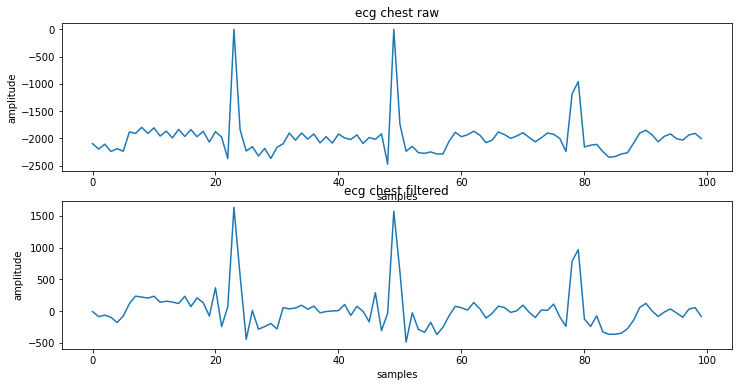

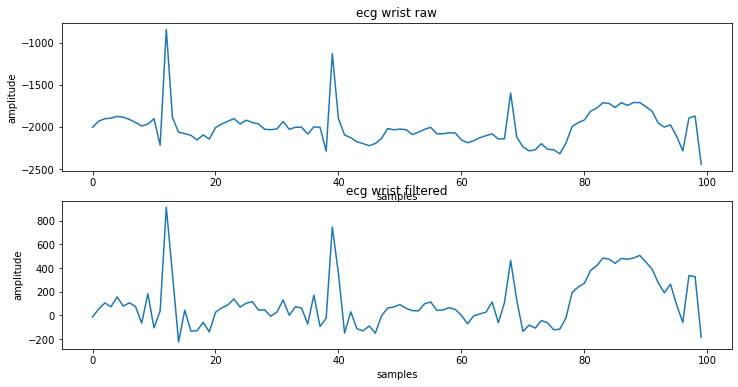

In [57]:
plotting(ecg_chest[:100], ecg_chest_f[:100], 'ecg chest')
plotting(ecg_wrist[:100], ecg_wrist_f[:100], 'ecg wrist')

In [ ]:
plotting(ppg1_rubber, ppg1_rubber_f, 'ppg1 rubber')
plotting(ppg2_rubber, ppg2_rubber_f, 'ppg2 rubber')

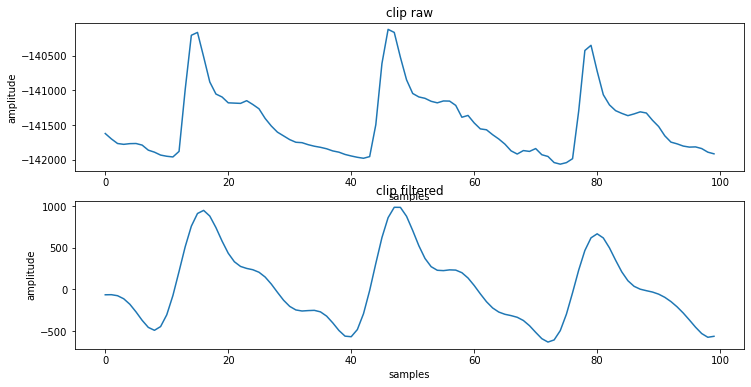

In [58]:
plotting(ppg1_clip[:100], ppg1_clip_f[:100], 'clip')

## Other functions

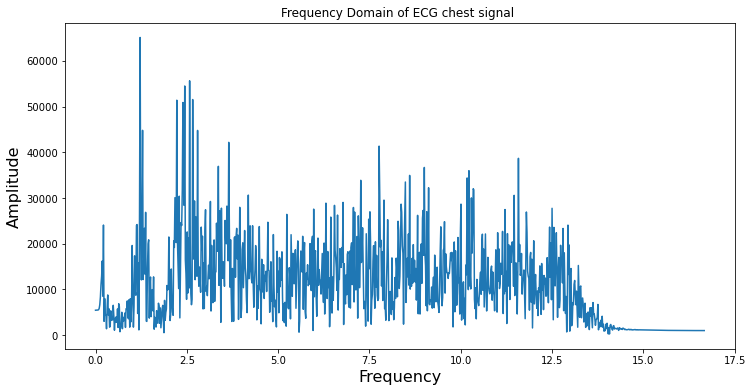

997 997


In [59]:
# FFT - Fourier transform

fs = 100/3
x_freq=np.fft.rfftfreq(len(ecg_chest_f),d = 1.0/fs) #frequency components in the signal
y_amp=np.abs(np.fft.rfft(ecg_chest_f,axis=0)) #amplitude of each frequency component

plt.figure(figsize=(12,6))
plt.title("Frequency Domain of ECG chest signal ")
plt.xlabel("Frequency",fontsize=16)
plt.ylabel("Amplitude",fontsize=16)
plt.plot(x_freq,y_amp)

plt.show()
print (len(x_freq),len(y_amp))

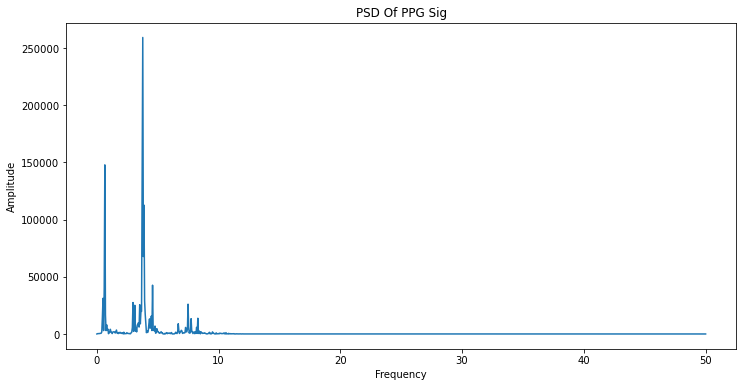

In [60]:
#PSD - power spectral density
#can be used to extract power band or entropy features of the signals
fs = 100
f, ppg_den = signal.periodogram(ppg1_rubber_f, fs)
#f: frequency components; ppg_den: power of the frequency component

#Plot the limited PSD-freq
plt.figure(figsize=(12,6))
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("PSD Of PPG Sig")
plt.plot(f, ppg_den)

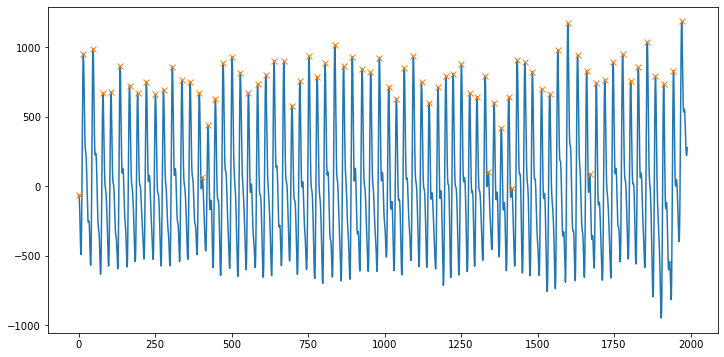

In [61]:
#peak detection
#argrelextrema
peak_location = sc.signal.argrelextrema(-1*ppg1_clip_f, np.greater, order = 5)[0]
plt.figure(figsize = (12,6))
plt.plot(-1*ppg1_clip_f)
plt.plot(peak_location, -1*ppg1_clip_f[peak_location], 'x')

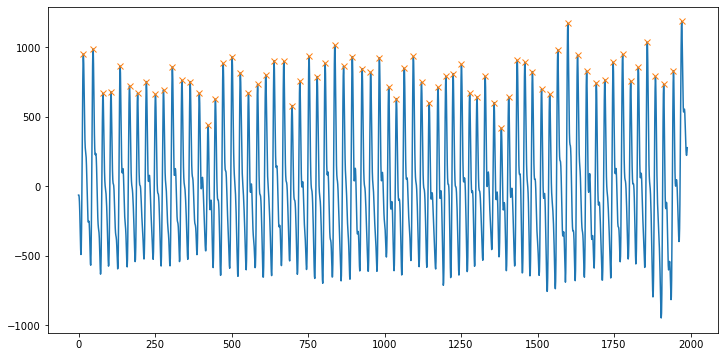

In [62]:
#findpeaks
peak = sc.signal.find_peaks(-1*ppg1_clip_f, distance = 12, height = 0,width = 2)[0]
plt.figure(figsize = (12,6))
plt.plot(-1*ppg1_clip_f)
plt.plot(peak, -1*ppg1_clip_f[peak], 'x')

In [63]:
from scipy.signal import argrelextrema
from scipy.signal import periodogram
def peak_detection(sig,fs):
    #Parameters: signal, sampling frequency
    #Returns: peaks indices
    ## peaks in raw signal
    NN_index_sig = np.array(argrelextrema(sig, np.greater)).reshape(1,-1)[0]
    ## filter the signal based on the frequancy of HR
    f, ppg_den = periodogram(sig, fs)
    min_f = np.where(f >= 0.6)[0][0] #minimum heart rate frequency
    max_f = np.where(f >= 4.0)[0][0] #maximum heart rate frequency
    ppg_HR_freq = ppg_den[min_f:max_f]
    HR_freq = f[min_f:max_f]
    # Define cut-off frequancy
    HRf = HR_freq[np.argmax(ppg_HR_freq)]
    boundary = 0.5
    if HRf - boundary > 0.6:
        HRfmin = HRf - boundary
    else:
        HRfmin = 0.6
    if HRf + boundary < 4.0:
        HRfmax = HRf + boundary
    else:
        HRfmax = 4.0
    filtered = butter_filtering(sig,fs, HRfmin,5,'highpass')
    
    ## peaks in filtered signal
    NN_index_filtered = np.array(argrelextrema(filtered, np.greater)).reshape(1,-1)[0]
    ## find the correct peaks according to peaks of raw and filtered
    NN_index = np.array([]).astype(int)
    for i in NN_index_filtered:
        NN_index = np.append(NN_index,NN_index_sig[np.abs(i - NN_index_sig).argmin()])
    NN_index = np.unique(NN_index)
    return(NN_index) 

In [64]:
#Calculate heart rate

#adjust peaks 
def find_corresponding(sig, locs1, w = 0.5*fs):
    locs2 = []
    w = int(w/2)
    for loc in locs1:
        l1, l2 = max(loc-w, 0), min(loc+w, len(sig))
        locs2.append(l1 + np.argmax(sig[l1:l2]))
        
    return np.unique(np.array(locs2))


def heart_rate(sig, fs, locs):
    """
    sig: input signal
    fs: sampling frequency
    locs: peak locations
    """
    
    plt.figure(figsize=(10,5))
    plt.plot(sig)
    plt.plot(locs, sig[locs], 'x')
    plt.show()
    interval = np.diff(locs)/fs
    hr = 60/np.mean(interval)
    
    return hr
    


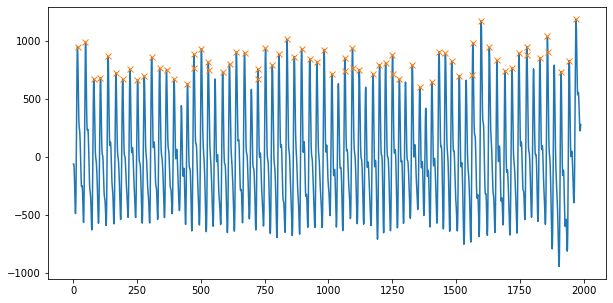

HR from PPG: 70.58823529411765


In [65]:
#Heart rate 
#HR from PPG_clip
peaks_ppg = peak_detection(preprocessing.scale(-1*ppg1_clip_f), 100/3)
loc_cor_ppg = find_corresponding(-1*ppg1_clip_f, peaks_ppg ,50)
hr_ppg = heart_rate(-1*ppg1_clip_f, 100/3, loc_cor_ppg)
print("HR from PPG:", hr_ppg)

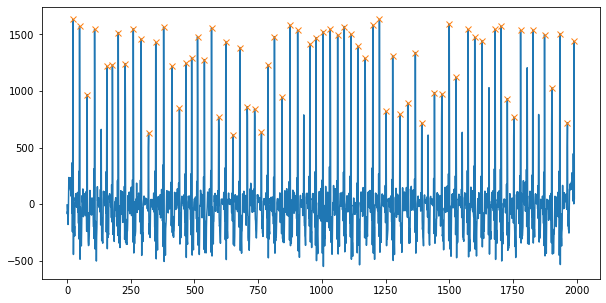

HR from ECG: 67.10726995424504


In [66]:
#HR from ECG_chest
peaks_ecg = peak_detection(-1*ecg_chest_f, 100/3)
loc_cor_ecg = find_corresponding(-1*ecg_chest_f, peaks_ecg, 50)
hr_ecg = heart_rate(-1*ecg_chest_f, 100/3, loc_cor_ecg)
print("HR from ECG:", hr_ecg)

In [ ]:
#Time delay between ECG & PPG
time_delay = (loc_ecg - loc_ppg)/fs